In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm 
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [6]:
iris = datasets.load_iris()

x = scale(iris.data) # this is scaling the data

y = pd.DataFrame(iris.target) # setting target variable using dataframe constructor
variable_names = iris.feature_names
x


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Clustering Data with K-Means Method


In [7]:
# we need to make a kmeans object n_clusters tells python how many centroids to use for clustering
#In iris data set there are 3 species of irises so we will put number of clusters =3
# random state initializes the centriods for clustering 
clustering = KMeans(n_clusters=3 , random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

# Plotting Model Outputs 

In [8]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

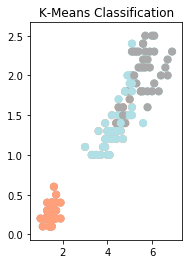

In [12]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])
# plotting the actual points that are not predicted and giving them color
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
# here we change the values were coloring to the clustering lables and change the title to K-Means Classificaiton
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')


# Comparing above and below it looks like K-Means did a good job of predicting the clusters

Text(0.5, 1.0, 'Ground Truth Classification')

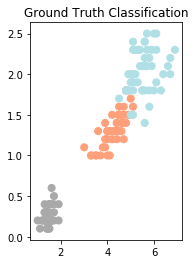

In [15]:

color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')


# REALIGNING GRAPHS USING RELABEL

Text(0.5, 1.0, 'K-Means Classification')

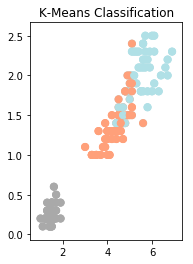

In [21]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
# plotting the actual points that are not predicted and giving them color
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
# here we change the values were coloring to the clustering lables and change the title to K-Means Classificaiton
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')


Text(0.5, 1.0, 'Ground Truth Classification')

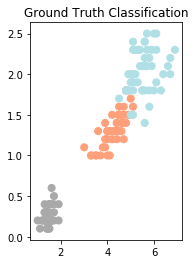

In [23]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
# plotting the actual points that are not predicted and giving them color
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

# Evaluating the model quantitatively using sikitlearns classification report to evaluate model


In [22]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [24]:
# Precision is the models relevancy 
# Recall is the models completeness
# What we are going for in machine learning is high precision and high recall
# that would indicate we have highly accurate model results

# Here we have every point predicted to have a 0 lablel 100 percent of retrieved instances were relevant 
# for every point predicted to have a 1 label 74 percent of retrieved instances were relevant
# for 2 77% retreieved were relevant!